# [LEGALST-123] Lab 04: Probability Distributions, Bootstrap, and Confidence Intervals

In [26]:
from datascience import *
from collections import Counter
import numpy as np
import pandas as pd
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Introduction
In this lab, we aim to prepare students for prediction exercises in PSET 1 and PSET 2 by focusing on several key aspects of exploratory data analysis (EDA) and data manipulation using the Nashville police stops dataset. The objectives of this lab are as follows:

**Data Cleaning**:
(Continuing from Lab 3): We will continue the data cleaning process by addressing issues not covered in Lab 3. This includes handling missing values through imputation or dropping as appropriate. During the data cleaning process, we will refer to simple plot exercises, such as scatter plots, box plots, and histograms, to make data-driven decisions.

**Summary Statistics**:
We will compute and display summary statistics for relevant columns, particularly 'age' and 'year.' This includes calculating the mean and median for these columns and explaining their significance in the context of the dataset. Visualizations: We will create visualizations, including histograms for 'column1' and 'column2' columns, scatter plots to visualize relationships between specific variables, and box plots to display data distributions. Interpretations of these visualizations will be provided.

**Aggregating Data**:
We will introduce data aggregation using Python libraries like pandas. Techniques such as grouping data using the groupby function in pandas will be explored, along with examples of aggregating data to gain insights. We will also explain the use of pivot tables in pandas for data aggregation.

**Time Series Analysis**:
Introduce time series data analysis using a specific example from the dataset. We will analyze and visualize police stop trends over time, such as monthly or yearly trends, using time-specific data to demonstrate aggregation techniques. Line plots will be created to visualize time series data.

## Data Cleaning (Continuing from Lab 3) #to_be_erased

## Summary -- To be erased

Load the Nashville police stops dataset. 


Continue data cleaning by addressing issues not covered in Lab 3.


Handle missing values by either imputation or dropping, as appropriate.


Referring to simple plot exercises (scatter, box, histogram) during the data cleaning process.
Describe the dataset and its columns.


Provide explanations for data cleaning decisions, emphasizing their impact on visualization and analysis.

In [45]:
# load the data - To be erased
user = "suminpark" #insert your user name
path = "/Users/" + user +  "/Documents/GitHub/Modules/Legalst-123/labs/data"
stops = pd.read_csv(path + "/stops_sample.csv", index_col = 0)
stops.head()

,index,raw_row_number,date,time,location,lat,lng,precinct,reporting_area,zone,...,raw_traffic_citation_issued,raw_misd_state_citation_issued,raw_suspect_ethnicity,raw_driver_searched,raw_passenger_searched,raw_search_consent,raw_search_arrest,raw_search_warrant,raw_search_inventory,raw_search_plain_view
0,1840907,93347,2010-04-18,13140.0,"BURGESS AVE & WHITE BRIDGE PIKE, NASHVILLE, TN...",36.145004,-86.857970,1.0,5103.0,113.0,...,False,NaN,N,False,False,False,False,False,False,False
1,492044,2001428,2015-01-19,19920.0,"DUE WEST AVE W & S GRAYCROFT AVE, MADISON, TN,...",36.249187,-86.734459,7.0,1797.0,723.0,...,False,False,N,False,False,False,False,False,False,False
2,431170,1996331,2015-01-15,1020.0,"S GALLATIN PIKE & MADISON BLVD, MADISON, TN, 3...",36.254979,-86.715246,7.0,1623.0,711.0,...,False,False,N,False,False,False,False,False,False,False
3,2066423,1319451,2013-05-17,62760.0,"CHARLOTTE PIKE & W HILLWOOD DR, NASHVILLE, TN,...",36.139093,-86.880533,1.0,5009.0,123.0,...,False,False,N,False,False,False,False,False,False,False
4,2899480,201349,2010-09-01,28140.0,"BELL RD & DODSON CHAPEL RD, HERMITAGE, TN, 37076",36.163310,-86.613147,5.0,9501.0,521.0,...,False,NaN,N,False,False,False,False,False,False,False


## Summary Statistics

### Part 1: Acquiring Data
1. **Obtain Data** - to retrive the dataset, we will now load the CSV file we have into a `pandas.DataFrame` object and start exploring the data!
We will use `path` vairable to traverse to the directory where our CSV file is located and use `pd.read_csv` to read our view our files!

In [77]:
user = "suminpark" #insert your user name
path = "/Users/" + user +  "/Documents/GitHub/Modules/Legalst-123/labs/data"
stops = pd.read_csv(path + "/stops_sample.csv", index_col = 0) #edit this later for the actual lab. 
stops.head()

,index,raw_row_number,date,time,location,lat,lng,precinct,reporting_area,zone,...,raw_traffic_citation_issued,raw_misd_state_citation_issued,raw_suspect_ethnicity,raw_driver_searched,raw_passenger_searched,raw_search_consent,raw_search_arrest,raw_search_warrant,raw_search_inventory,raw_search_plain_view
0,1840907,93347,2010-04-18,13140.0,"BURGESS AVE & WHITE BRIDGE PIKE, NASHVILLE, TN...",36.145004,-86.857970,1.0,5103.0,113.0,...,False,NaN,N,False,False,False,False,False,False,False
1,492044,2001428,2015-01-19,19920.0,"DUE WEST AVE W & S GRAYCROFT AVE, MADISON, TN,...",36.249187,-86.734459,7.0,1797.0,723.0,...,False,False,N,False,False,False,False,False,False,False
2,431170,1996331,2015-01-15,1020.0,"S GALLATIN PIKE & MADISON BLVD, MADISON, TN, 3...",36.254979,-86.715246,7.0,1623.0,711.0,...,False,False,N,False,False,False,False,False,False,False
3,2066423,1319451,2013-05-17,62760.0,"CHARLOTTE PIKE & W HILLWOOD DR, NASHVILLE, TN,...",36.139093,-86.880533,1.0,5009.0,123.0,...,False,False,N,False,False,False,False,False,False,False
4,2899480,201349,2010-09-01,28140.0,"BELL RD & DODSON CHAPEL RD, HERMITAGE, TN, 37076",36.163310,-86.613147,5.0,9501.0,521.0,...,False,NaN,N,False,False,False,False,False,False,False


### Part 2: Clean and Explore the Data

From loading our csv file and using `.head()`, we see that the fields include variables such as the longitude and latitude, the subject's race/age,  and the date and time of the offense.

Let's also check some basic information about this DataFrame using the `DataFrame.info` ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html)) and `DataFrame.describe` methods ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)).

In [78]:
# df.info() displays
# name and type of each column, 
# number of non-null entries, and 
# size of dataframe
stops.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           1000 non-null   int64  
 1   raw_row_number                  1000 non-null   object 
 2   date                            1000 non-null   object 
 3   time                            996 non-null    float64
 4   location                        1000 non-null   object 
 5   lat                             940 non-null    float64
 6   lng                             940 non-null    float64
 7   precinct                        887 non-null    float64
 8   reporting_area                  903 non-null    float64
 9   zone                            887 non-null    float64
 10  subject_age                     999 non-null    float64
 11  subject_race                    1000 non-null   object 
 12  subject_sex                     998

Note that each columns sometimes different count of non-null counts. For instance, `raw_row_number` column has 1000 non-null counts while `zone` has only 887 non-null counts. This is because the `.info()` method only counts non-null entries.

In [79]:
stops.describe()

,index,time,lat,lng,precinct,reporting_area,zone,subject_age
count,1.000000e+03,996.000000,940.000000,940.000000,887.000000,903.000000,887.000000,999.000000
mean,1.491263e+06,47195.963855,36.146446,-86.762884,4.401353,7770.545958,460.828636,36.811812
std,8.823683e+05,24555.357937,0.115117,0.376956,2.248430,12490.193085,225.863415,13.748406
min,1.425000e+03,60.000000,33.522888,-97.407823,1.000000,889.000000,111.000000,16.000000
25%,7.216352e+05,30660.000000,36.109700,-86.789033,2.000000,3020.000000,227.000000,26.000000
50%,1.456574e+06,48810.000000,36.154908,-86.751799,4.000000,5501.000000,425.000000,34.000000
75%,2.282808e+06,67755.000000,36.190809,-86.703740,6.000000,8815.000000,621.000000,46.000000
max,3.091709e+06,86280.000000,36.373107,-84.751067,8.000000,95020.000000,835.000000,82.000000


Notice that the functions above reveal type information for the columns, as well as some basic statistics about the numerical columns found in the DataFrame. However, we still need more information about what each column represents. Let’s explore the data further in Question 1!

In [54]:
stops[["raw_row_number"]]

,raw_row_number
0,93347
1,2001428
2,1996331
3,1319451
4,201349
...,...
995,929050
996,1145747
997,2534242
998,566920


In [31]:
stop = stops[["subject_age", "subject_race"]]
stop.groupby(['subject_race']).mean()

,subject_age
subject_race,
asian/pacific islander,35.450000
black,35.506427
hispanic,30.963636
other,32.500000
unknown,37.083333
white,38.512573


In [32]:
stop.groupby(['subject_race']).median()

,subject_age
subject_race,
asian/pacific islander,33.0
black,32.0
hispanic,31.0
other,33.0
unknown,37.5
white,35.0


Notice that the functions above reveal type information for the columns, as well as some basic statistics about the numerical columns found in the DataFrame. However, if we want to explore more on the mean or median of the specific varibles, we can use the groupby function. 

In the below example let's use the groupby function to find the age mean/median for each race. 

Compute and display summary statistics for relevant columns, such as 'age' and 'year.'

Calculate the mean and median for these columns.

Explain the significance of mean and median in the context of the dataset.

## Exploratory Data Analysis

### 1. Visualizations

#### **1.1 Histograms:** Create histograms for 'column1' and 'column2' columns.

Interpret the distributions of these variables.

In [33]:
# HISTOGRAM CODE

#### **1.2 Scatter Plots:** Generate sccatter plots to visualize relationships between specific variables. 

Discuss any insights gained from scatter plots.

In [34]:
# SCATTER CODE

#### 1.3 **Box Plots:** Create a box plots for relevant columns. 

Explain the concept of box plots and their use in displaying data distributions. Interpret the box plots and identify outliers if present. What is the shape of the plot?

In [35]:
# BOX CODE

### 2. Aggregating Data: 

Introduction to aggregating data using Python libraries like pandas.

Explore techniques such as grouping data using the groupby function in pandas.

Provide examples of aggregating data to gain insights.

Explain the use of pivot tables in pandas for data aggregation

In [36]:
# HERE

### 3. Time Series Analysis: 
Introduce time series data analysis using a specific example from the dataset.

Analyze and visualize police stop trends over time (e.g., monthly or yearly).

Use time-specific data to demonstrate aggregation techniques.

Create line plots to visualize time series data.

**Question 1.5.1**: 
Can you provide a specific example from the Nashville dataset that highlights the importance of time series analysis, using columns like 'date' and 'time'? 

Hint: 
1. You can explore how police stops have evolved over time by focusing on the 'date' and 'time' columns. Look for temporal trends that may require time series analysis. 
2. Use column "citation_issued"

In [71]:
# Extract time-related columns, e.g., 'date' and 'time', and other relevant data
time_series_data = stops[['date', 'time', 'citation_issued']]

# Further data processing and analysis
# ...

WRITE SOMETHING ABOUT CHANGING TO DATE TIME AND PUTTING THAT TO INDEX. 

In [72]:
time_series_data.index = pd.to_datetime(time_series_data["date"])
time_series_data = time_series_data.drop("date", axis=1)
time_series_data

,time,citation_issued
date,,
2010-04-18,13140.0,False
2015-01-19,19920.0,False
2015-01-15,1020.0,False
2013-05-17,62760.0,False
2010-09-01,28140.0,False
...,...,...
2012-07-01,6360.0,False
2012-01-10,65220.0,True
2016-08-12,78420.0,False


**Question 1.5.2**: How can we effectively group the data to analyze police stop trends on a monthly or yearly basis using the 'date' column, and what insights can such analysis provide?

Hint: 
1. Consider using the 'date' column to group data into monthly or yearly intervals. 
2. Create line plots to visualize how police stop trends change over time.
3. Using column "citation_issues"


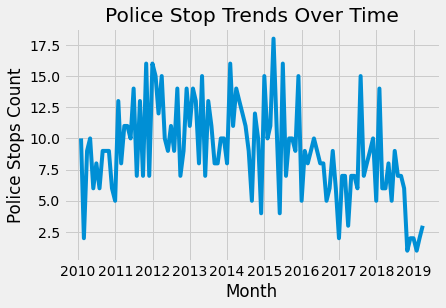

In [75]:
# Sample code to group data and create time series visualizations
import matplotlib.pyplot as plt

# Group data by month and analyze trends
monthly_data = time_series_data.resample('M').count()  # Resample data to monthly frequency

# Create a line plot to visualize monthly trends
plt.plot(monthly_data.index, monthly_data['citation_issued'])
plt.xlabel('Month')
plt.ylabel('Police Stops Count')
plt.title('Police Stop Trends Over Time')
plt.show()

**Question 1.5.3**: What are some key aggregation techniques that can be applied to the time-specific data in this dataset, particularly using the 'date' column, and why are they important for understanding the dataset?

Hint: 
1. Consider aggregation methods such as count or mean to analyze the dataset over time, focusing on the 'date' column.
2. Use "citation_issued" for 'your_column_of_interest'
3. Use Sum as 'your_aggregation_function' with the specific variables you are interested in analyzing within your dataset.

In [24]:
# Sample code for demonstrating aggregation techniques
aggregated_data = time_series_data.groupby('date').agg({'your_column_of_interest': 'your_aggregation_function'})

NameError: name 'time_series_data' is not defined

**Question 1.5.4**: Could you explain the process of creating line plots to visualize time series data based on the 'date' column, and provide an example of what a line plot might reveal about the data over time?

Hint: 
1. Use the aggregated data from Section 3 and create line plots to visually represent trends over time.
2. Use "citation_issued" as 'your_column_of_interest'.

In [25]:
# Sample code for creating line plots to visualize time series data
plt.plot(aggregated_data.index, aggregated_data['your_column_of_interest'])
plt.xlabel('Date')
plt.ylabel('Your Y-axis Label')
plt.title('Time Series Data Visualization')
plt.show()

NameError: name 'aggregated_data' is not defined

## Conclusion 

Summarize key findings from the data analysis. Discuss insights or patterns observed during the analysis.

Reflect on the importance of data cleaning, summary statistics, visualization, and data aggregation in exploratory data analysis.



In [31]:
# HERE

## References

Include references or data sources used in the lab, such as the Stanford traffic stop data library and relevant documents related to Nashville policing practices for traffic stops.